# Lesson 3

    

    

*   Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston.
*   Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

### Данные

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
df['target'] = load_boston().target

In [ ]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Пропуски отсутствуют

In [ ]:
num_cols = df.columns[:-1]

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


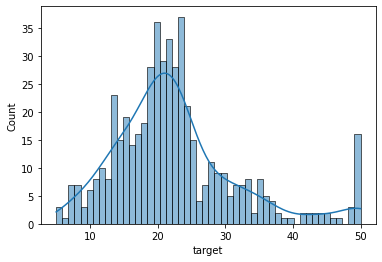

In [ ]:
sns.histplot(df['target'], bins=50, kde=True)
plt.show()

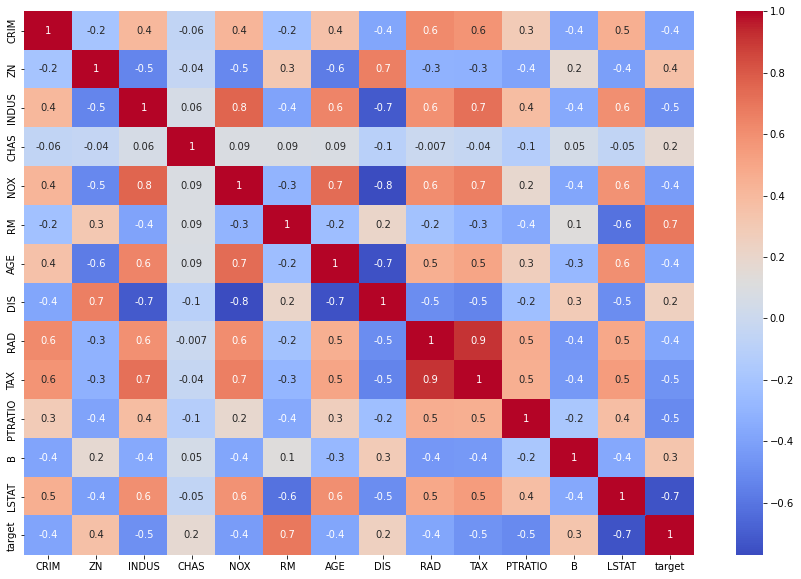

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='coolwarm')
plt.show()

### Подготовка данных

In [ ]:
seed = 25

X = df[num_cols]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=seed)

In [ ]:
from scipy.stats import shapiro, normaltest

print('Проверка распределения целевой переменной на нормальность: ', normaltest(y))
print('Проверка распределения целевой переменной на нормальность: ', shapiro(y))

Проверка распределения целевой переменной на нормальность:  NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)
Проверка распределения целевой переменной на нормальность:  ShapiroResult(statistic=0.9171748757362366, pvalue=4.940195786292171e-16)


Значения целевой переменной не относятся к нормальному распределению

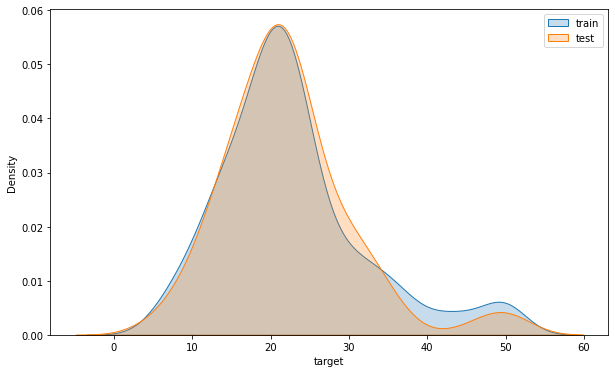

MannwhitneyuResult(statistic=20801.5, pvalue=0.8813118846100312)


In [ ]:
from scipy.stats import mannwhitneyu

plt.figure(figsize=(10, 6))
sns.kdeplot(y_train, fill=True, shade=0.4)
sns.kdeplot(y_test, fill=True, shade=0.4)
plt.legend(['train', 'test'])
plt.show()


print(mannwhitneyu(y_train, y_test))

Стандартизация

In [ ]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

### Модель

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Wed Feb  1 14:58:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    27W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, Sequential

In [ ]:
X_train.shape

(404, 13)

In [ ]:
tf.random.set_seed(seed)

results = pd.DataFrame(columns=['optimizer', 'activations', 'n_neurons', 'epochs', 'train_mse', 'test_mse', 'overfit'])
optimizers = ['RMSprop', 'Adam', 'Nadam']
activations = ['elu', 'selu', 'relu', 'tanh']
n_neurons = np.arange(64, 512, 64)
epochs = np.arange(10, 41, 10)
train_mse, test_mse = [], []

for optimizer in optimizers:
    for activation in activations:
        # print(optimizer, activation)
        for neurons in n_neurons:
            for num_epoch in epochs:
                input = Input(shape=(13,))
                x1 = Flatten()(input)
                x2 = Dense(neurons, activation=activation)(x1)
                x3 = Dense(neurons, activation=activation)(x2)
                x4 = Dense(neurons, activation=activation)(x3)
                x5 = Dense(neurons, activation=activation)(x4)
                output = Dense(1, activation='relu')(x5)

                model = Model(input, output)

                model.compile(
                    optimizer=optimizer,
                    loss=tf.keras.losses.MeanSquaredError()
                    )
                
                history = model.fit(X_train_scal, y_train,                       
                                    validation_data=(X_test_scal, y_test),
                                    batch_size=5,
                                    epochs=num_epoch,
                                    verbose=0)

                train_mse = (model.evaluate(X_train_scal, y_train, verbose=1))
                test_mse = (model.evaluate(X_test_scal, y_test, verbose=1))
                results.loc[results.shape[0]] = [optimizer, activation, neurons, num_epoch, train_mse, test_mse, (test_mse - train_mse)]

In [ ]:
results.sort_values(by=['test_mse'], axis=0, ascending=True).head(15)

,optimizer,activations,n_neurons,epochs,train_mse,test_mse,overfit
11,RMSprop,elu,192,40,5.157984,4.876970,-0.281014
259,Nadam,selu,128,40,4.334768,5.048738,0.713970
118,Adam,elu,128,30,6.548596,5.057274,-1.491322
239,Nadam,elu,256,40,5.345623,5.527457,0.181834
187,Adam,relu,320,40,3.074737,5.548131,2.473395
150,Adam,selu,192,30,5.419474,5.600540,0.181066
7,RMSprop,elu,128,40,5.670105,5.743801,0.073695
126,Adam,elu,256,30,6.599976,5.805070,-0.794906
179,Adam,relu,192,40,2.446964,5.819524,3.372560
203,Adam,tanh,128,40,5.323808,5.951820,0.628013


Возьмем модель RMSprop с 1 места сортированной таблицы:


*   Оптимизатор RMSprop
*   функция активации elu
*   192 нейронов в скрытом слое
*   40 эпох обучения 

т.к. в этой один из самых маленьких показателей mse и отсутствует переобучение.






### Финальная модель

Подбор скорости обучения модели

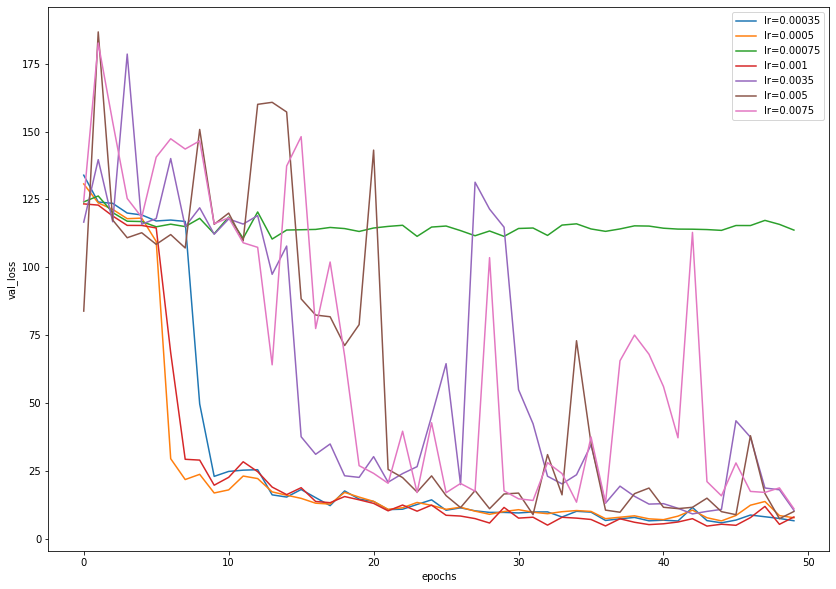

In [139]:
plt.figure(figsize=(14, 10))

tf.random.set_seed(seed)

for i in [0.00035, 0.0005, 0.00075, 0.001, 0.0035, 0.005, 0.0075]:
    input = Input(shape=(13,))
    x1 = Flatten()(input)
    x2 = Dense(192, activation='elu')(x1)
    x3 = Dense(192, activation='elu')(x2)
    x4 = Dense(192, activation='elu')(x3)
    x5 = Dense(192, activation='elu')(x4)
    output = Dense(1, activation='relu')(x5)

    final_model = Model(input, output)

    final_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=i),
                        loss=tf.keras.losses.MeanSquaredError())

    history = final_model.fit(X_train_scal, y_train,
                    validation_data=(X_test_scal, y_test),
                    batch_size=5,
                    epochs=50,
                    verbose=0)
    
    plt.plot(history.history['val_loss'], label=f'lr={i}')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.show()


возьмем learning rate = 0.001

In [181]:
tf.random.set_seed(seed)

input = Input(shape=(13,))
x1 = Flatten()(input)
x2 = Dense(192, activation='elu')(x1)
x3 = Dense(192, activation='elu')(x2)
x4 = Dense(192, activation='elu')(x3)
x5 = Dense(192, activation='elu')(x4)
output = Dense(1, activation='relu')(x5)

final_model = Model(input, output)

final_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                    loss=tf.keras.losses.MeanSquaredError())

history = final_model.fit(X_train_scal, y_train,
                validation_data=(X_test_scal, y_test),
                batch_size=5,
                epochs=60,
                verbose=0,
                callbacks=tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
                            )

### Результат

In [190]:
y_pred_test = final_model.predict(X_test_scal, verbose=0)
y_pred_train = final_model.predict(X_train_scal, verbose=0)

print(f'r2 на обучающей выборке = {r2_score(y_train, y_pred_train)}')
print(f'r2 на валидационной выборке = {r2_score(y_test, y_pred_test)}')

r2 на обучающей выборке = 0.9206416996769164
r2 на валидационной выборке = 0.9231151651777066
